# Alon Greenberg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SCORECARD.csv')

C:\Users\green\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,9,31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# DataDocumentation
# https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf
# MostRecent csv

In [4]:
df.shape

(7058, 1977)

# 1.1. What is the most costly college? 

In [5]:
# Combine annual cost and program cost to have one column for all institues tutuion
df['COST'] = df['COSTT4_A']
df['COST'] = df['COST'].fillna(df['COSTT4_P'])

In [6]:
print ('The most expensive school is')
print (df.loc[df['COST'].idxmax()].INSTNM)
print ('For the cost of:')
print (df.loc[df['COST'].idxmax()].COST)

The most expensive school is
L3 Commercial Training Solutions Airline Academy
For the cost of:
105745.0


# 1.2. What is the cheapest?

In [7]:
print ('The most expensive annual tution school is')
print (df.loc[df['COST'].idxmin()].INSTNM)
print ('For the cost of:')
print (df.loc[df['COST'].idxmin()].COST)

The most expensive annual tution school is
Purdue University Northwest
For the cost of:
0.0


In [8]:
# check if there is any other school where the tuition is 0$

In [9]:
df.loc[df['COST'] == 0.0]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,COST
6589,490805,182700,1827,Purdue University Northwest,Hammond,IN,46323,Higher Learning Commission,www.pnw.edu,admissions.pnw.edu/financial-aid/net-price-cal...,...,0.2533,0.018,0.3599,0.3677,0.2544,0.019,0.3776,0.2318,0.3717,0.0


In [10]:
# Observation: There is only one school where tution = 0$.

# 2. What is the average cost for college for colleges in different parts of the US?

In [11]:
tutionData = df.dropna(subset=['COST'])

In [12]:
tutionData = round(tutionData.groupby(['STABBR'])['COST'].mean())

In [13]:
print ('The avarge tutition for each state')
print ('In descending order')
print  ('')
print (tutionData.sort_values(ascending=False))

The avarge tutition for each state
In descending order

STABBR
VT    39869.0
DC    36921.0
MA    35063.0
RI    34898.0
PA    29007.0
NH    28653.0
ME    28091.0
NY    27910.0
IN    26988.0
CT    26631.0
IA    25968.0
MD    25329.0
CA    25254.0
VA    25170.0
NJ    25149.0
MN    24887.0
WI    24553.0
DE    24394.0
NE    24390.0
SC    24323.0
OR    23797.0
FL    23676.0
GA    23428.0
OH    23277.0
IL    23245.0
CO    23154.0
NC    22907.0
TN    22750.0
MI    22736.0
NV    22694.0
MO    22621.0
KY    22480.0
WA    22177.0
KS    21793.0
TX    21573.0
AZ    21327.0
SD    21214.0
LA    20874.0
HI    20745.0
AL    20662.0
AK    20203.0
UT    20058.0
ID    19609.0
MS    19143.0
AR    18277.0
WV    18102.0
NM    18100.0
OK    17511.0
ND    17174.0
MT    17120.0
VI    16786.0
WY    14714.0
GU    12339.0
PR    11653.0
FM     9554.0
MH     8750.0
MP     8734.0
AS     7400.0
PW     6085.0
Name: COST, dtype: float64


# 3. What is the average cost for college for religious vs. secular institutions?

In [14]:
# From the Data Dictionary:
# -1	Not reported (Which doesn't appear in the table)
# All the other codes are specific religious affiliations
# such as:
#22	American Evangelical Lutheran Church
#24	African Methodist Episcopal Zion Church

# by that I can infer that NaN are secular

In [15]:
# create new data frame for religious tuition
# drop all rows where religious is NaN
religiousTuition = df.dropna(subset=['RELAFFIL'])
# calculate the avarage tutition for religious schools
print ('The avarage tutition for religious schools is:')
print (round(religiousTuition.COST.mean()),'$')

The avarage tutition for religious schools is:
37389 $


In [16]:
# create new data frame for secular tuition
# drop all rows where religious is NaN
secularTuition = df.loc[pd.isnull(df).any(1),:]
# calculate the avarage annual tutition for religious schools
print ('The avarage annual tutition for secular schools is:')
print (round(secularTuition.COST.mean()),'$')

The avarage annual tutition for secular schools is:
23869 $


# 4. What percent of colleges have an open admission policy?

In [17]:
# From the Data Dictionary:
# Open admissions policy indicator:
# 1	Yes
# 2	No

# create a data frame with only open addmission schools:

# drop rows with NaN value
openAdmission = df.dropna(subset=['OPENADMP'])
#drop rows with non-open admision
openAdmission = openAdmission[openAdmission.OPENADMP !=2]

# calculate the percentage of open admission out of all schools
print('There are', len(openAdmission), 'schools with open admission')
print('which make', round((len(openAdmission))/(len(df))*100),
      '% of all', len(df), 'schools')

There are 4063 schools with open admission
which make 58 % of all 7058 schools


# 5. What is the correlation (scatterplot) between admission rates and college cost?

In [18]:
# Since there are annual costs or program costs there are two scatter plots:

In [19]:
# 5.1. Annual costs
AdRt_COST = df[['ADM_RATE', 'COST']].copy()

In [20]:
AdRt_COST.corr()

,ADM_RATE,COST
ADM_RATE,1.000000,-0.301969
COST,-0.301969,1.000000


In [21]:
# The correlation between Addmision rate and cost is -0.302

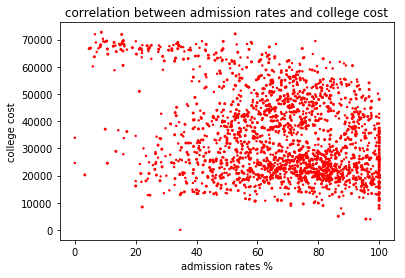

In [22]:
s = (4,2)
plt.scatter(df.ADM_RATE*100, df.COST, s, color='r')
plt.title("correlation between admission rates and college cost")
plt.xlabel("admission rates %")
plt.ylabel("college cost")
plt.show()

# 6. What is the correlation between SAT scores and admission rates? Are there any outliers?

In [23]:
AdRt_SATavg = df[['ADM_RATE', 'SAT_AVG']].copy()

# 6.1 Correlation: SAT / Admission Rate

In [24]:
AdRt_SATavg.corr()

,ADM_RATE,SAT_AVG
ADM_RATE,1.000000,-0.413266
SAT_AVG,-0.413266,1.000000


In [25]:
# The correlation between Addmision rate and SAT scores is -0.41

# 6.2 Outliers

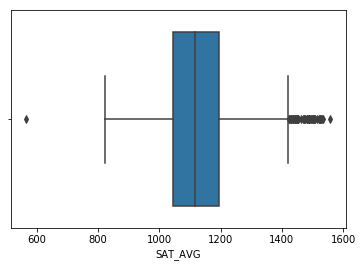

In [26]:
sns.boxplot(df.SAT_AVG)

In [27]:
# Observation: There is one an outlier just below 600 
df.SAT_AVG.sort_values(ascending=True).head(2)

825     564.0
2513    822.0
Name: SAT_AVG, dtype: float64

In [28]:
# Observation: There is one an outlier with sat avarage of 564

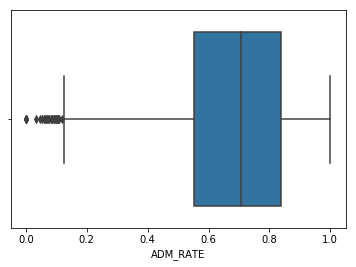

In [29]:
sns.boxplot(df.ADM_RATE)

In [30]:
# Observation: There are outliers close to 0.0
df.ADM_RATE.sort_values(ascending=True).head(5)

6065    0.000
5188    0.000
2960    0.000
6610    0.000
2964    0.033
Name: ADM_RATE, dtype: float64

In [31]:
# Observation: There are 4 outliers with 0 admission rate

# Xtra Credit
# 7. What colleges have the highest and lowest family income averages? 
#     How does that correlate with college costs?

In [32]:
# df['COST'] = df['COST'].fillna(df['COSTT4_P'])
df['FAMINC'] = df['FAMINC'].replace('PrivacySuppressed', np.nan)
df['FAMINC'] = df.FAMINC.astype(float)

# 7.1. Max / Min Family Income

In [33]:
print('The maximal family income registred is:  ', round(df['FAMINC'].max()),'$')
print('Institution:',df.iloc[df['FAMINC'].idxmax].INSTNM,',', df.iloc[df['FAMINC'].idxmax].STABBR)

The maximal family income registred is:   174263.0 $
Institution: Jewish Theological Seminary of America , NY


In [34]:
print('The maximal family income registred is:  ', round(df['FAMINC'].min()),'$')
print('Institution:',df.iloc[df['FAMINC'].idxmin].INSTNM,',', df.iloc[df['FAMINC'].idxmin].STABBR)

The maximal family income registred is:   321.0 $
Institution: J F Ingram State Technical College , AL


# 7.2 Correlation: Family Income / Tuition 

In [35]:
famIncm_Cost = df[['FAMINC', 'COST']].copy()

In [36]:
famIncm_Cost.corr()

,FAMINC,COST
FAMINC,1.0000,0.6758
COST,0.6758,1.0000


In [37]:
#The correlation between a familys income and tuition cost is A moderate uphill (positive) relationship of 0.67